In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_1samp, mannwhitneyu, kruskal, wilcoxon


In [79]:
df = pd.read_excel("./AB_Test_Results (2).xlsx")

/Users/evgenybokovnev/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [80]:
df.head

<bound method NDFrame.head of       USER_ID VARIANT_NAME  REVENUE
0         737      variant      0.0
1        2423      control      0.0
2        9411      control      0.0
3        7311      control      0.0
4        6174      variant      0.0
...       ...          ...      ...
9995     1981      control      0.0
9996      502      variant      0.0
9997     9214      variant      0.0
9998     7741      control      0.0
9999     9468      control      0.0

[10000 rows x 3 columns]>

In [82]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


In [84]:
df.shape

(10000, 3)

In [86]:
df[df['VARIANT_NAME'] == 'variant'].count()

USER_ID         5016
VARIANT_NAME    5016
REVENUE         5016
dtype: int64

In [88]:
df[df['VARIANT_NAME'] == 'control'].count()

USER_ID         4984
VARIANT_NAME    4984
REVENUE         4984
dtype: int64

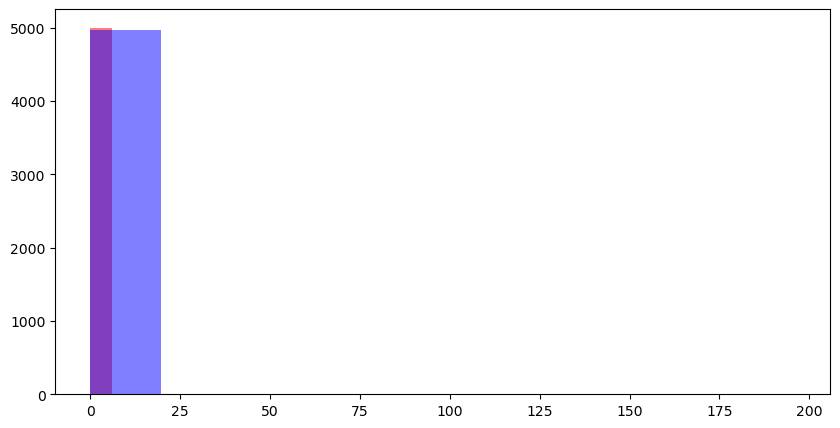

In [104]:
plt.figure(figsize=(10, 5))
control_visit_all = df['REVENUE'][df['VARIANT_NAME'] == 'variant']
test_visit_all = df['REVENUE'][df['VARIANT_NAME'] == 'control']

plt.hist(control_visit_all, color='r', bins=10, alpha = 0.5)
plt.hist(test_visit_all, color='b', bins=10, alpha = 0.5)

plt.show()

In [108]:
mw_stats = mannwhitneyu(x=df[(df['VARIANT_NAME'] == 'variant')]['REVENUE'].values,
                        y=df[(df['VARIANT_NAME'] == 'control')]['REVENUE'].values)

mw_stats

MannwhitneyuResult(statistic=12478180.0, pvalue=0.47825247965294926)

pvalue большой, значит статистически значимых различий в выборках нет.
Следовательно, по результатам теста можно сказать, что гипотеза не несёт с собой  какой-то финансовой выгоды и её нужно отклонить.